## A jupyter notebook version file for the `main.py`


Set `autoreload` to execute the change in `.py` files.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import _pickle
from pathlib import Path

# dataset_dir = "D:/Databases/CAS(ME)^2"
# dataset_dir = "I:/HEH/Databases/CAS(ME)^2"
dataset_dir = "/data/disk1/heh/databases/CAS(ME)^2"
image_size = 128


## Crop Images


In [3]:
from image_processing import *

# crop_images(dataset_name)


## Load Images


When debug the image processing, the videos_images is from cropped_rawpic, whereas the other variables are from rawpic.


In [4]:
from image_processing import *

# videos_images, subjects, subjects_videos_code = load_images(dataset_dir)
videos_images, subjects, subjects_videos_code = load_images_dev(
    dataset_dir, images_loading=False, image_size=128
)


subject:  s15
subject:  s16
subject:  s19
subject:  s20
subject:  s21
subject:  s22
subject:  s23
subject:  s24
subject:  s25
subject:  s26
subject:  s27
subject:  s29
subject:  s30
subject:  s31
subject:  s32
subject:  s33
subject:  s34
subject:  s35
subject:  s36
subject:  s37
subject:  s38
subject:  s40


In [5]:
print("subjects:", subjects)
print("subjects_videos_code:", subjects_videos_code)


subjects: ['s15', 's16', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's40']
subjects_videos_code: [['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0508'], ['0101', '0102', '0401', '0402', '0502', '0505', '0507'], ['0102', '0402', '0505', '0507', '0502'], ['0502'], ['0101', '0401'], ['0101', '0102', '0402', '0503', '0508'], ['0102', '0402', '0503', '0507'], ['0101', '0401', '0402', '0502', '0507'], ['0101', '0102', '0502', '0508'], ['0101', '0102', '0401', '0503'], ['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0507', '0508'], ['0502'], ['0101', '0102', '0401', '0502', '0503', '0505', '0507'], ['0101', '0401', '0402', '0502', '0503', '0505', '0507'], ['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0507', '0508'], ['0102', '0402'], ['0401', '0402', '0503'], ['0102'], ['0401', '0505'], ['0101', '0402', '0502', '0505', '0507', '0508'], ['0502', '0507'], ['0401', '0502', '

## Load Excel 


In [6]:
from label_processing import load_excel

Excel_data = load_excel(dataset_dir)


In [7]:
Excel_data.head(5)


,participant,video_name_&_expression_number,onset,apex,offset,AUs,extimated_emotion,expression_type,self-reported_emotion,video_name,video_code,subject
0,1,anger1_1,557,572,608,4+10+14+15,negative,macro-expression,anger,anger1,0401,s15
1,1,anger1_2,2854,2862,2871,38,others,macro-expression,sadness,anger1,0401,s15
2,1,anger2_1,2155,2163,0,NaN,negative,macro-expression,anger,anger2,0402,s15
3,1,anger2_2,3363,3371,3383,4+7+14,negative,macro-expression,anger,anger2,0402,s15
4,1,anger2_3,3380,3386,3407,4+14+38,negative,macro-expression,anger,anger2,0402,s15


## Load Ground Truth Labels


In [8]:
from label_processing import load_ground_truth_labels

expression_type = "micro-expression"
# expression_type = "macro-expression"

(
    clean_videos_images,
    clean_subjects_videos_code,
    clean_subjects,
    clean_subjects_videos_ground_truth_labels,
) = load_ground_truth_labels(
    dataset_dir,
    expression_type,
    videos_images,
    subjects_videos_code,
    subjects,
    Excel_data,
)


required_videos_index:  [1, 4, 8, 9, 12, 13, 14, 16, 28, 33, 36, 37, 38, 45, 46, 47, 49, 50, 52, 54, 55, 57, 62, 64, 67, 71, 73, 74, 77, 83, 87, 91, 93]
len(clean_videos_images) = 33


In [9]:
print("len(clean_subjects): ", len(clean_subjects))
print("clean_subjects: ", clean_subjects)
print("len(clean_subjects_videos_code): ", len(clean_subjects_videos_code))
print("clean_subjects_videos_codes: ", clean_subjects_videos_code)
print(
    "len(clean_subjects_videos_ground_truth_labels): ",
    len(clean_subjects_videos_ground_truth_labels),
)
print(
    "clean_subjects_videos_ground_truth_labels: ",
    clean_subjects_videos_ground_truth_labels,
)


len(clean_subjects):  14
clean_subjects:  ['s15' 's16' 's19' 's23' 's24' 's25' 's27' 's29' 's30' 's31' 's32' 's35'
 's37' 's38']
len(clean_subjects_videos_code):  14
clean_subjects_videos_codes:  [['0102', '0502'], ['0101', '0102', '0502', '0505', '0507'], ['0402'], ['0102'], ['0401', '0507'], ['0101', '0102'], ['0101', '0102', '0401', '0502', '0503', '0507'], ['0502'], ['0101', '0401'], ['0101', '0402', '0505'], ['0401', '0502', '0503', '0508'], ['0102'], ['0402', '0508'], ['0507']]
len(clean_subjects_videos_ground_truth_labels):  14
clean_subjects_videos_ground_truth_labels:  [[[[698, 706]], [[137, 147]]], [[[551, 564]], [[269, 277]], [[322, 333]], [[395, 406], [1694, 1709], [1879, 1894]], [[1957, 1967], [2284, 2294]]], [[[1926, 1941]]], [[[330, 345], [525, 539], [726, 739]]], [[[607, 620], [962, 976], [1889, 1901], [2180, 2192], [3440, 3452]], [[1835, 1847], [1950, 1964], [3232, 3247]]], [[[112, 126]], [[995, 1007], [1007, 1016], [1017, 1033]]], [[[873, 887]], [[33, 47], [308, 316],

## Calculate k


In [10]:
from label_processing import calculate_k

k = calculate_k(clean_subjects_videos_ground_truth_labels)


k (Half of average length of expression) =  6


## Extract Features


It takes about 260 mins.


Compute Optical Flow Features (shape = [128, 128, 3])


In [11]:
from features_extraction import extract_features

# clean_videos_images_features = extract_features(clean_videos_images, k, image_size=128)


## Preprocessing


It takes 563 min.


In [12]:
from pre_processing import preprocess

# resampled_clean_videos_images_features = preprocess(
#     clean_videos_images, clean_videos_images_features, k
# )


### Dump Resampled Clean Videos Images Features


In [13]:
# if expression_type == "micro-expression":
#     with open(
#         Path(
#             dataset_dir,
#             "resampled_clean_videos_images_me_features_" + str(image_size) + ".pkl",
#         ),
#         "wb",
#     ) as pkl_file:
#         _pickle.dump(resampled_clean_videos_images_features, pkl_file)
#         pkl_file.close()
# elif expression_type == "macro-expression":
#     with open(
#         Path(
#             dataset_dir,
#             "resampled_clean_videos_images_mae_features_" + str(image_size) + ".pkl",
#         ),
#         "wb",
#     ) as pkl_file:
#         _pickle.dump(resampled_clean_videos_images_features, pkl_file)
#         pkl_file.close()


### Load **Original** Resampled Clean Videos Images Features


In [14]:
if expression_type == "micro-expression":
    with open(
        Path(
            dataset_dir,
            "original_resampled_clean_videos_images_me_features.pkl",
        ),
        "rb",
    ) as pkl_file:
        resampled_clean_videos_images_features = _pickle.load(pkl_file)
        pkl_file.close()
elif expression_type == "macro-expression":
    with open(
        Path(
            dataset_dir,
            "original_resampled_clean_videos_images_mae_features.pkl",
        ),
        "rb",
    ) as pkl_file:
        resampled_clean_videos_images_features = _pickle.load(pkl_file)
        pkl_file.close()


### Load Resampled Clean Videos Images Features


In [15]:
# if expression_type == "micro-expression":
#     with open(
#         Path(
#             dataset_dir,
#             "resampled_clean_videos_images_me_features_" + str(image_size) + ".pkl",
#         ),
#         "rb",
#     ) as pkl_file:
#         resampled_clean_videos_images_features = _pickle.load(pkl_file)
#         pkl_file.close()
# elif expression_type == "macro-expression":
#     with open(
#         Path(
#             dataset_dir,
#             "resampled_clean_videos_images_mae_features_" + str(image_size) + ".pkl",
#         ),
#         "rb",
#     ) as pkl_file:
#         resampled_clean_videos_images_features = _pickle.load(pkl_file)
#         pkl_file.close()


In [16]:
print(
    "len(resampled_clean_videos_images_features): ",
    len(resampled_clean_videos_images_features),
)
print(
    "len(resampled_clean_videos_images_features[0]): ",
    len(resampled_clean_videos_images_features[0]),
)
print(
    "resampled_clean_videos_images_features[0][0].shape: ",
    resampled_clean_videos_images_features[0][0].shape,
)


len(resampled_clean_videos_images_features):  33
len(resampled_clean_videos_images_features[0]):  1069
resampled_clean_videos_images_features[0][0].shape:  (42, 42, 3)


## Pseudo Labeling


In [17]:
from labeling import *

labels = pseudo_labeling(
    clean_videos_images, clean_subjects_videos_ground_truth_labels, k
)
# labels = original_labeling(
#     clean_videos_images, clean_subjects_videos_ground_truth_labels, k
# )


Total frames: 80463


## Prepare for LOSO


In [18]:
from loso_preparing import prepare_for_loso

X, y, groups = prepare_for_loso(
    resampled_clean_videos_images_features,
    labels,
    clean_subjects,
    clean_videos_images,
    clean_subjects_videos_ground_truth_labels,
    k,
)


Frame Index for each subject:-

subject s15 ( group = 0 ) : 0 -> 3336
subject s15 has 2 clean video(s)
sum clean_subject_videos_ground_truth_labels_len:  2

subject s16 ( group = 1 ) : 3336 -> 14273
subject s16 has 5 clean video(s)
sum clean_subject_videos_ground_truth_labels_len:  7

subject s19 ( group = 2 ) : 14273 -> 18638
subject s19 has 1 clean video(s)
sum clean_subject_videos_ground_truth_labels_len:  8

subject s23 ( group = 3 ) : 18638 -> 19703
subject s23 has 1 clean video(s)
sum clean_subject_videos_ground_truth_labels_len:  9

subject s24 ( group = 4 ) : 19703 -> 26673
subject s24 has 2 clean video(s)
sum clean_subject_videos_ground_truth_labels_len:  11

subject s25 ( group = 5 ) : 26673 -> 29790
subject s25 has 2 clean video(s)
sum clean_subject_videos_ground_truth_labels_len:  13

subject s27 ( group = 6 ) : 29790 -> 44942
subject s27 has 6 clean video(s)
sum clean_subject_videos_ground_truth_labels_len:  19

subject s29 ( group = 7 ) : 44942 -> 47211
subject s29 has 1 

## Training


2023-01-02 18:18:16.821367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 18:18:16.964230: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-02 18:18:16.998683: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-02 18:18:17.617013: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Split 1 is in process.
------Initializing Model-------


2023-01-02 18:18:18.669509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 18:18:19.298160: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9633 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:d8:00.0, compute capability: 7.5


Dataset Labels Counter({0: 76163, 1: 964})
After Downsampling Dataset Labels Counter({0: 38081, 1: 964})
After Augmentation Dataset Labels Counter({0: 38081, 1: 3856})
Epoch 1/20


2023-01-02 18:19:47.944216: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


328/328 [==============================] - 59s 124ms/step - loss: 0.2932 - accuracy: 0.8418 - mean_absolute_error: 0.2629 - val_loss: 0.0386 - val_accuracy: 0.9916 - val_mean_absolute_error: 0.1844
Epoch 2/20
328/328 [==============================] - 38s 113ms/step - loss: 0.1424 - accuracy: 0.8564 - mean_absolute_error: 0.1893 - val_loss: 0.0097 - val_accuracy: 0.9916 - val_mean_absolute_error: 0.0383
Epoch 3/20
328/328 [==============================] - 39s 115ms/step - loss: 0.1323 - accuracy: 0.8486 - mean_absolute_error: 0.1886 - val_loss: 0.0107 - val_accuracy: 0.9916 - val_mean_absolute_error: 0.0439
Epoch 4/20
328/328 [==============================] - 39s 116ms/step - loss: 0.1220 - accuracy: 0.8529 - mean_absolute_error: 0.1857 - val_loss: 0.0102 - val_accuracy: 0.9916 - val_mean_absolute_error: 0.0412
Epoch 5/20
328/328 [==============================] - 39s 117ms/step - loss: 0.1088 - accuracy: 0.8544 - mean_absolute_error: 0.1851 - val_loss: 0.0120 - val_accuracy: 0.9916 

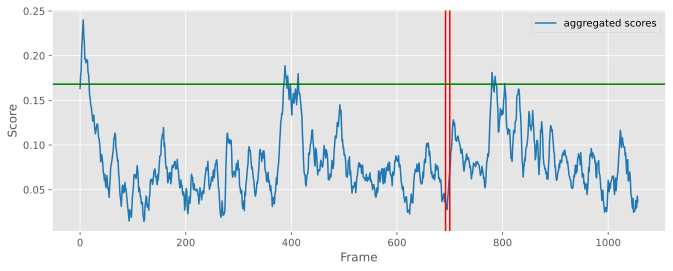

The current video be processed: subject s15, video 0102


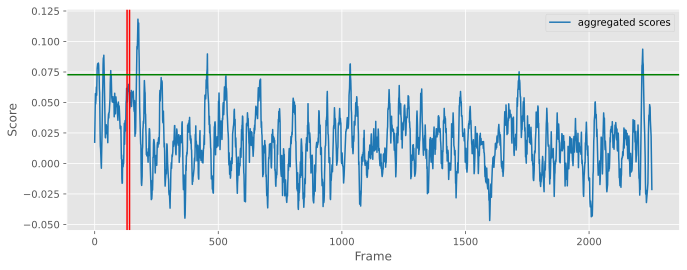

The current video be processed: subject s15, video 0502

True Positive: 0 False Posive: 15 False Negative: 2
Precision = 2.220446049250313e-16, Recall =2.220446049250313e-16, F1-Score = 4.440892098500626e-16
Split 1 is processed.

Split 2 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 68667, 1: 859})
After Downsampling Dataset Labels Counter({0: 34333, 1: 859})
After Augmentation Dataset Labels Counter({0: 34333, 1: 3436})
Epoch 1/20
296/296 [==============================] - 53s 131ms/step - loss: 0.2569 - accuracy: 0.8526 - mean_absolute_error: 0.2707 - val_loss: 0.0152 - val_accuracy: 0.9878 - val_mean_absolute_error: 0.0680
Epoch 2/20
296/296 [==============================] - 38s 127ms/step - loss: 0.1483 - accuracy: 0.8524 - mean_absolute_error: 0.2051 - val_loss: 0.0140 - val_accuracy: 0.9878 - val_mean_absolute_error: 0.0550
Epoch 3/20
296/296 [==============================] - 37s 123ms/step - loss: 0.1348 - accuracy: 0.8466 - mean_absolute_error: 0.

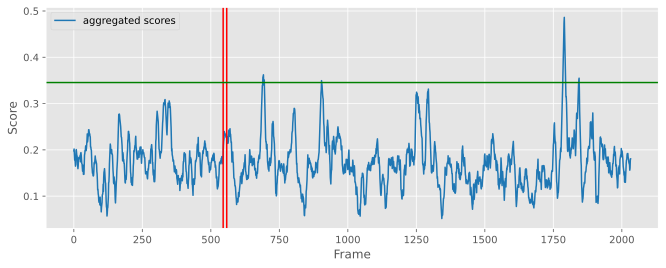

The current video be processed: subject s16, video 0101


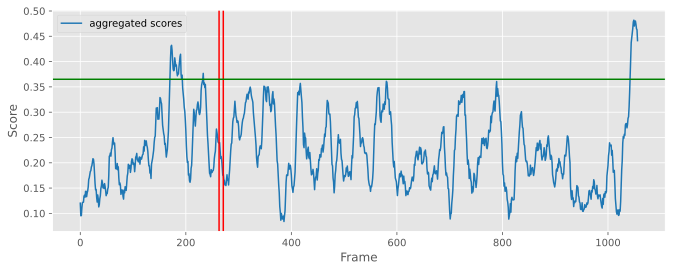

The current video be processed: subject s16, video 0102


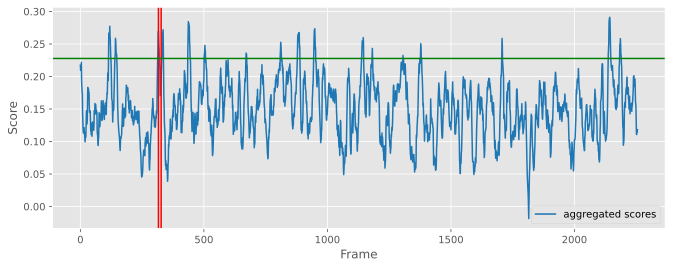

The current video be processed: subject s16, video 0502


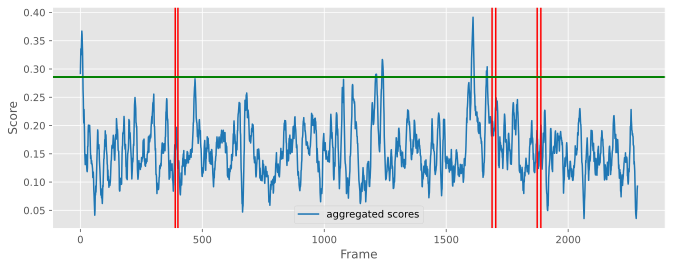

The current video be processed: subject s16, video 0505


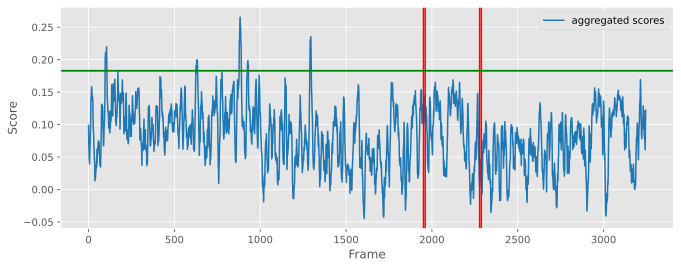

The current video be processed: subject s16, video 0507

True Positive: 0 False Posive: 52 False Negative: 10
Precision = 2.220446049250313e-16, Recall =2.220446049250313e-16, F1-Score = 4.440892098500626e-16
Split 2 is processed.

Split 3 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 75126, 1: 972})
After Downsampling Dataset Labels Counter({0: 37563, 1: 972})
After Augmentation Dataset Labels Counter({0: 37563, 1: 3888})
Epoch 1/20
324/324 [==============================] - 52s 120ms/step - loss: 0.2982 - accuracy: 0.8397 - mean_absolute_error: 0.2546 - val_loss: 0.0066 - val_accuracy: 0.9954 - val_mean_absolute_error: 0.0397
Epoch 2/20
324/324 [==============================] - 38s 116ms/step - loss: 0.1348 - accuracy: 0.8473 - mean_absolute_error: 0.1950 - val_loss: 0.0214 - val_accuracy: 0.9954 - val_mean_absolute_error: 0.1121
Epoch 3/20
324/324 [==============================] - 38s 116ms/step - loss: 0.1179 - accuracy: 0.8469 - mean_absolute_error: 0

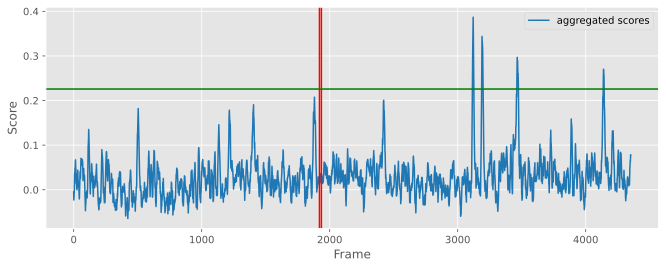

The current video be processed: subject s19, video 0402

True Positive: 0 False Posive: 57 False Negative: 11
Precision = 2.220446049250313e-16, Recall =2.220446049250313e-16, F1-Score = 4.440892098500626e-16
Split 3 is processed.

Split 4 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 78463, 1: 935})
After Downsampling Dataset Labels Counter({0: 39231, 1: 935})
After Augmentation Dataset Labels Counter({0: 39231, 1: 3740})
Epoch 1/20
336/336 [==============================] - 54s 116ms/step - loss: 0.1948 - accuracy: 0.8600 - mean_absolute_error: 0.2440 - val_loss: 0.0835 - val_accuracy: 0.9465 - val_mean_absolute_error: 0.1580
Epoch 2/20
336/336 [==============================] - 37s 110ms/step - loss: 0.1226 - accuracy: 0.8662 - mean_absolute_error: 0.1872 - val_loss: 0.0591 - val_accuracy: 0.9465 - val_mean_absolute_error: 0.1038
Epoch 3/20
336/336 [==============================] - 38s 112ms/step - loss: 0.0999 - accuracy: 0.8699 - mean_absolute_error: 0

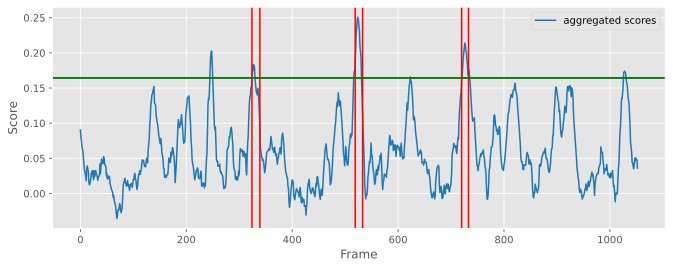

The current video be processed: subject s23, video 0102

True Positive: 2 False Posive: 62 False Negative: 12
Precision = 0.03125000000000022, Recall =0.14285714285714307, F1-Score = 0.05128205128205182
Split 4 is processed.

Split 5 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 72645, 1: 848})
After Downsampling Dataset Labels Counter({0: 36322, 1: 848})
After Augmentation Dataset Labels Counter({0: 36322, 1: 3392})
Epoch 1/20
311/311 [==============================] - 53s 124ms/step - loss: 0.2640 - accuracy: 0.8539 - mean_absolute_error: 0.2499 - val_loss: 0.0238 - val_accuracy: 0.9793 - val_mean_absolute_error: 0.0593
Epoch 2/20
311/311 [==============================] - 37s 118ms/step - loss: 0.1338 - accuracy: 0.8575 - mean_absolute_error: 0.1990 - val_loss: 0.0310 - val_accuracy: 0.9793 - val_mean_absolute_error: 0.1207
Epoch 3/20
311/311 [==============================] - 38s 120ms/step - loss: 0.1091 - accuracy: 0.8609 - mean_absolute_error: 0.1882 

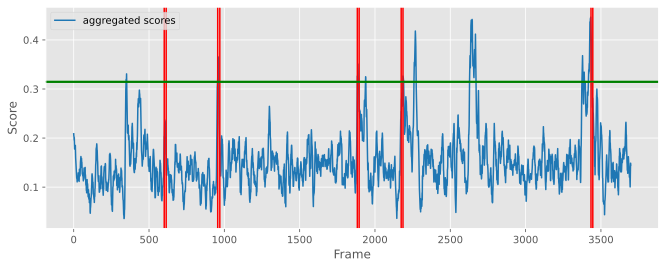

The current video be processed: subject s24, video 0401


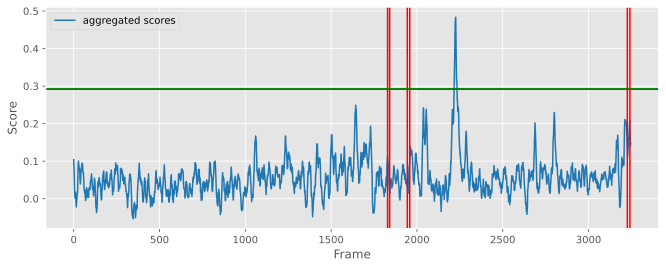

The current video be processed: subject s24, video 0507

True Positive: 4 False Posive: 79 False Negative: 18
Precision = 0.048192771084337574, Recall =0.18181818181818205, F1-Score = 0.07619047619047672
Split 5 is processed.

Split 6 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 76416, 1: 930})
After Downsampling Dataset Labels Counter({0: 38208, 1: 930})
After Augmentation Dataset Labels Counter({0: 38208, 1: 3720})
Epoch 1/20
328/328 [==============================] - 53s 119ms/step - loss: 0.2536 - accuracy: 0.8468 - mean_absolute_error: 0.2633 - val_loss: 0.0200 - val_accuracy: 0.9801 - val_mean_absolute_error: 0.0511
Epoch 2/20
328/328 [==============================] - 37s 113ms/step - loss: 0.1544 - accuracy: 0.8538 - mean_absolute_error: 0.2006 - val_loss: 0.0200 - val_accuracy: 0.9801 - val_mean_absolute_error: 0.0467
Epoch 3/20
328/328 [==============================] - 39s 117ms/step - loss: 0.1394 - accuracy: 0.8467 - mean_absolute_error: 0.1958

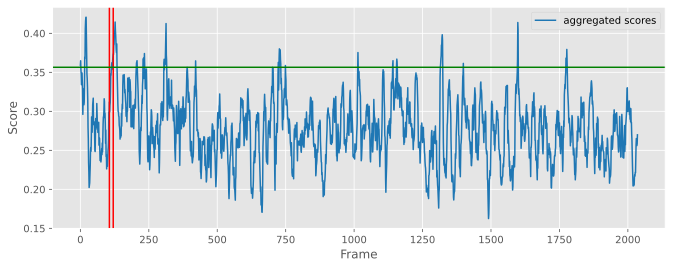

The current video be processed: subject s25, video 0101


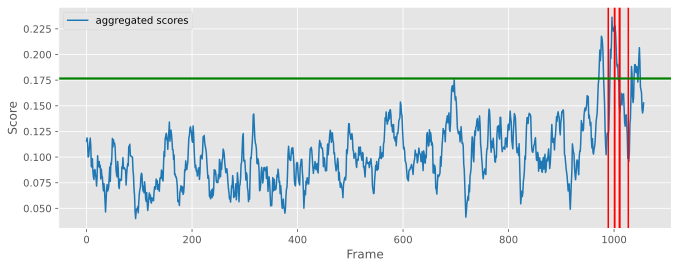

The current video be processed: subject s25, video 0102

True Positive: 6 False Posive: 102 False Negative: 20
Precision = 0.055555555555555775, Recall =0.230769230769231, F1-Score = 0.08955223880597069
Split 6 is processed.

Split 7 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 64515, 1: 796})
After Downsampling Dataset Labels Counter({0: 32257, 1: 796})
After Augmentation Dataset Labels Counter({0: 32257, 1: 3184})
Epoch 1/20
277/277 [==============================] - 52s 137ms/step - loss: 0.2381 - accuracy: 0.8416 - mean_absolute_error: 0.2711 - val_loss: 0.0151 - val_accuracy: 0.9871 - val_mean_absolute_error: 0.0593
Epoch 2/20
277/277 [==============================] - 37s 132ms/step - loss: 0.1302 - accuracy: 0.8598 - mean_absolute_error: 0.1913 - val_loss: 0.0206 - val_accuracy: 0.9871 - val_mean_absolute_error: 0.0875
Epoch 3/20
277/277 [==============================] - 37s 132ms/step - loss: 0.1183 - accuracy: 0.8480 - mean_absolute_error: 0.1987 

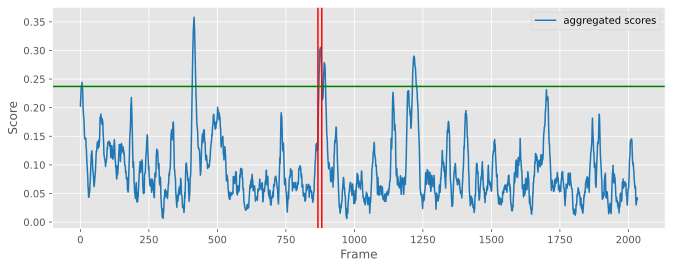

The current video be processed: subject s27, video 0101


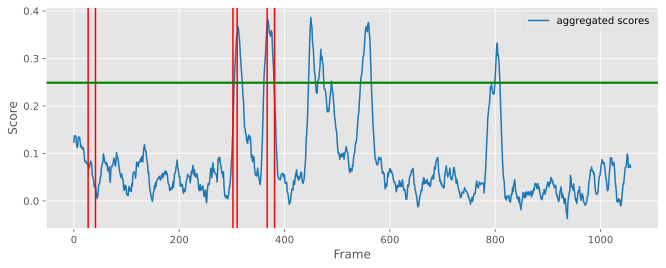

The current video be processed: subject s27, video 0102


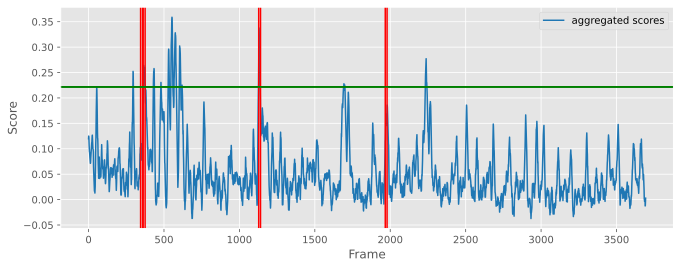

The current video be processed: subject s27, video 0401


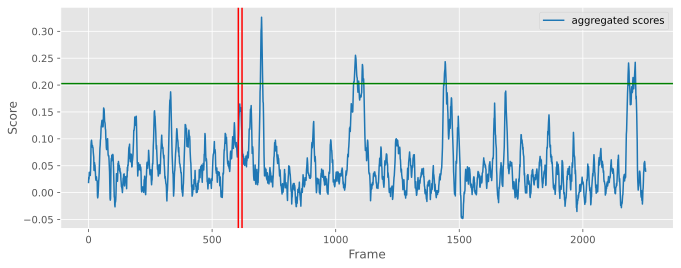

The current video be processed: subject s27, video 0502


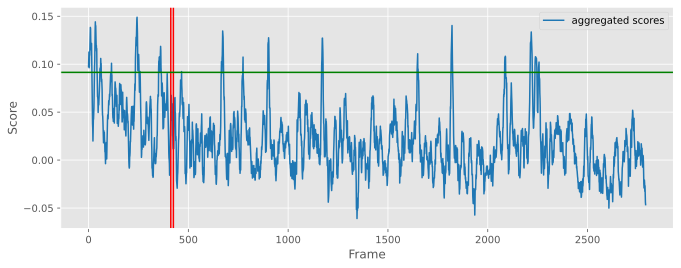

The current video be processed: subject s27, video 0503


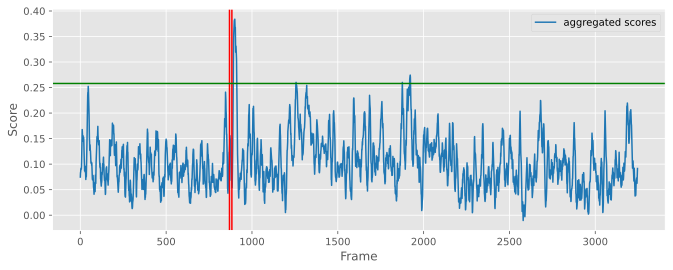

The current video be processed: subject s27, video 0507

True Positive: 10 False Posive: 164 False Negative: 27
Precision = 0.05747126436781631, Recall =0.2702702702702705, F1-Score = 0.09478672985782044
Split 7 is processed.

Split 8 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 77219, 1: 975})
After Downsampling Dataset Labels Counter({0: 38609, 1: 975})
After Augmentation Dataset Labels Counter({0: 38609, 1: 3900})
Epoch 1/20
333/333 [==============================] - 53s 117ms/step - loss: 0.2736 - accuracy: 0.8475 - mean_absolute_error: 0.2673 - val_loss: 0.0279 - val_accuracy: 0.9925 - val_mean_absolute_error: 0.1515
Epoch 2/20
333/333 [==============================] - 38s 113ms/step - loss: 0.1514 - accuracy: 0.8510 - mean_absolute_error: 0.1993 - val_loss: 0.0089 - val_accuracy: 0.9925 - val_mean_absolute_error: 0.0381
Epoch 3/20
333/333 [==============================] - 39s 116ms/step - loss: 0.1354 - accuracy: 0.8508 - mean_absolute_error: 0.1908

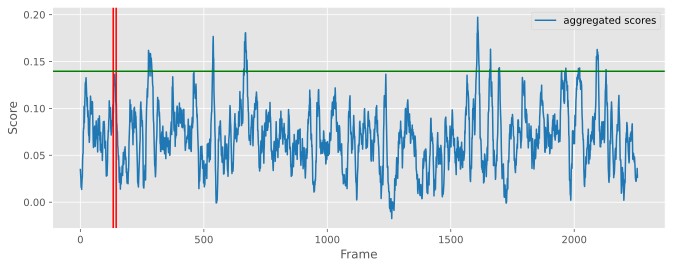

The current video be processed: subject s29, video 0502

True Positive: 10 False Posive: 179 False Negative: 28
Precision = 0.05291005291005313, Recall =0.2631578947368423, F1-Score = 0.08810572687224723
Split 8 is processed.

Split 9 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 73752, 1: 956})
After Downsampling Dataset Labels Counter({0: 36876, 1: 956})
After Augmentation Dataset Labels Counter({0: 36876, 1: 3824})
Epoch 1/20
318/318 [==============================] - 54s 123ms/step - loss: 0.2785 - accuracy: 0.8523 - mean_absolute_error: 0.2517 - val_loss: 0.0087 - val_accuracy: 0.9937 - val_mean_absolute_error: 0.0504
Epoch 2/20
318/318 [==============================] - 37s 116ms/step - loss: 0.1521 - accuracy: 0.8429 - mean_absolute_error: 0.2063 - val_loss: 0.0081 - val_accuracy: 0.9937 - val_mean_absolute_error: 0.0421
Epoch 3/20
318/318 [==============================] - 38s 117ms/step - loss: 0.1245 - accuracy: 0.8590 - mean_absolute_error: 0.1892

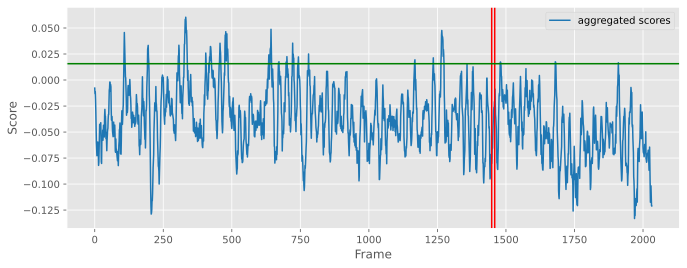

The current video be processed: subject s30, video 0101


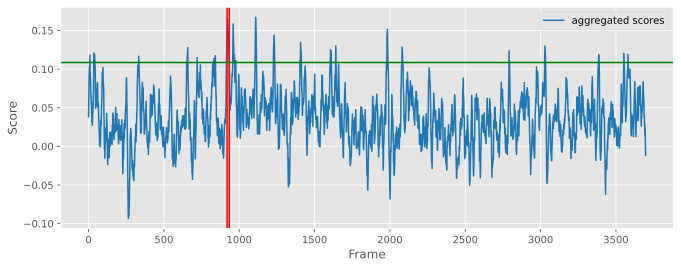

The current video be processed: subject s30, video 0401

True Positive: 11 False Posive: 227 False Negative: 29
Precision = 0.04621848739495821, Recall =0.27500000000000024, F1-Score = 0.07913669064748258
Split 9 is processed.

Split 10 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 70870, 1: 886})
After Downsampling Dataset Labels Counter({0: 35435, 1: 886})
After Augmentation Dataset Labels Counter({0: 35435, 1: 3544})
Epoch 1/20
305/305 [==============================] - 52s 126ms/step - loss: 0.2670 - accuracy: 0.8593 - mean_absolute_error: 0.2603 - val_loss: 0.0140 - val_accuracy: 0.9878 - val_mean_absolute_error: 0.0470
Epoch 2/20
305/305 [==============================] - 38s 121ms/step - loss: 0.1617 - accuracy: 0.8419 - mean_absolute_error: 0.2132 - val_loss: 0.0146 - val_accuracy: 0.9878 - val_mean_absolute_error: 0.0549
Epoch 3/20
305/305 [==============================] - 37s 121ms/step - loss: 0.1308 - accuracy: 0.8466 - mean_absolute_error: 0.19

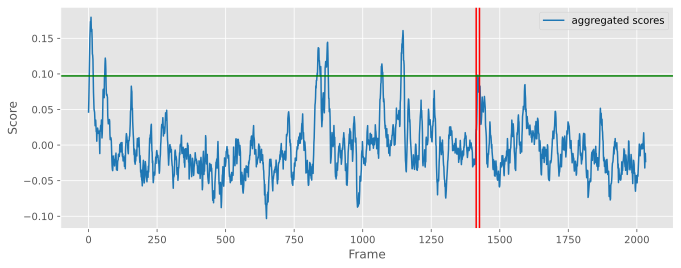

The current video be processed: subject s31, video 0101


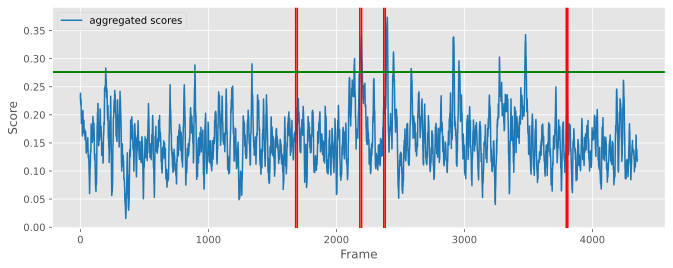

The current video be processed: subject s31, video 0402


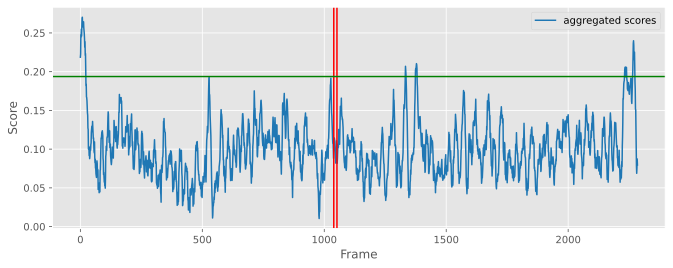

The current video be processed: subject s31, video 0505

True Positive: 13 False Posive: 256 False Negative: 33
Precision = 0.048327137546468626, Recall =0.2826086956521741, F1-Score = 0.08253968253968309
Split 10 is processed.

Split 11 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 70141, 1: 884})
After Downsampling Dataset Labels Counter({0: 35070, 1: 884})
After Augmentation Dataset Labels Counter({0: 35070, 1: 3536})
Epoch 1/20
302/302 [==============================] - 54s 128ms/step - loss: 0.3051 - accuracy: 0.8434 - mean_absolute_error: 0.2539 - val_loss: 0.0411 - val_accuracy: 0.9886 - val_mean_absolute_error: 0.1877
Epoch 2/20
302/302 [==============================] - 37s 121ms/step - loss: 0.1405 - accuracy: 0.8469 - mean_absolute_error: 0.1970 - val_loss: 0.0149 - val_accuracy: 0.9886 - val_mean_absolute_error: 0.0659
Epoch 3/20
302/302 [==============================] - 37s 123ms/step - loss: 0.1251 - accuracy: 0.8476 - mean_absolute_error: 0.1

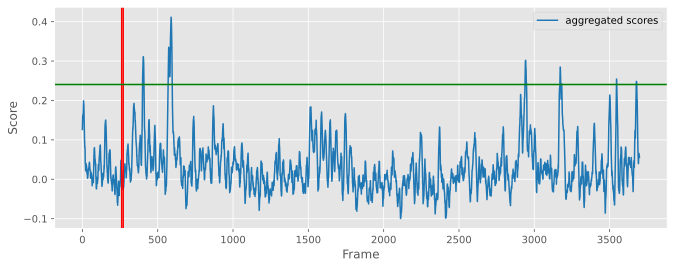

The current video be processed: subject s32, video 0401


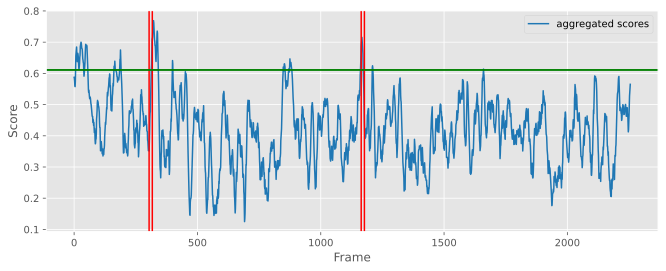

The current video be processed: subject s32, video 0502


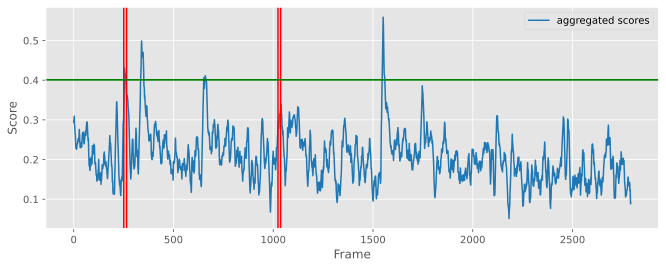

The current video be processed: subject s32, video 0503


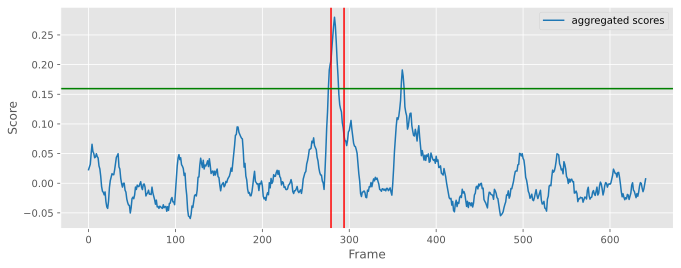

The current video be processed: subject s32, video 0508

True Positive: 16 False Posive: 285 False Negative: 36
Precision = 0.05315614617940222, Recall =0.30769230769230793, F1-Score = 0.09065155807365495
Split 11 is processed.

Split 12 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 78427, 1: 961})
After Downsampling Dataset Labels Counter({0: 39213, 1: 961})
After Augmentation Dataset Labels Counter({0: 39213, 1: 3844})
Epoch 1/20
337/337 [==============================] - 53s 116ms/step - loss: 0.2691 - accuracy: 0.8405 - mean_absolute_error: 0.2708 - val_loss: 0.0299 - val_accuracy: 0.9712 - val_mean_absolute_error: 0.0669
Epoch 2/20
337/337 [==============================] - 39s 112ms/step - loss: 0.1305 - accuracy: 0.8514 - mean_absolute_error: 0.2018 - val_loss: 0.0379 - val_accuracy: 0.9712 - val_mean_absolute_error: 0.1087
Epoch 3/20
337/337 [==============================] - 38s 111ms/step - loss: 0.1041 - accuracy: 0.8600 - mean_absolute_error: 0.1

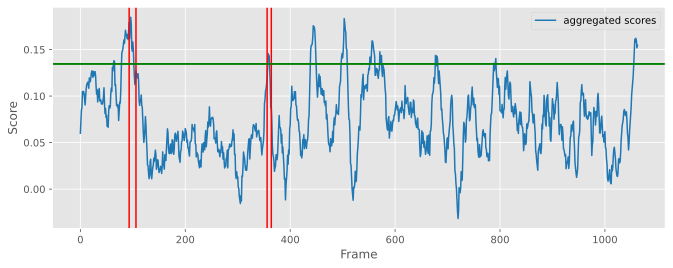

The current video be processed: subject s35, video 0102

True Positive: 18 False Posive: 294 False Negative: 36
Precision = 0.05769230769230792, Recall =0.33333333333333354, F1-Score = 0.09836065573770547
Split 12 is processed.

Split 13 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 74486, 1: 958})
After Downsampling Dataset Labels Counter({0: 37243, 1: 958})
After Augmentation Dataset Labels Counter({0: 37243, 1: 3832})
Epoch 1/20
321/321 [==============================] - 54s 122ms/step - loss: 0.2440 - accuracy: 0.8491 - mean_absolute_error: 0.2634 - val_loss: 0.0080 - val_accuracy: 0.9932 - val_mean_absolute_error: 0.0341
Epoch 2/20
321/321 [==============================] - 38s 117ms/step - loss: 0.1522 - accuracy: 0.8580 - mean_absolute_error: 0.1929 - val_loss: 0.0229 - val_accuracy: 0.9932 - val_mean_absolute_error: 0.1365
Epoch 3/20
321/321 [==============================] - 39s 120ms/step - loss: 0.1511 - accuracy: 0.8444 - mean_absolute_error: 0.1

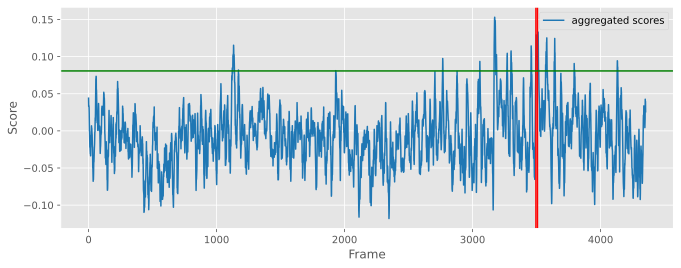

The current video be processed: subject s37, video 0402


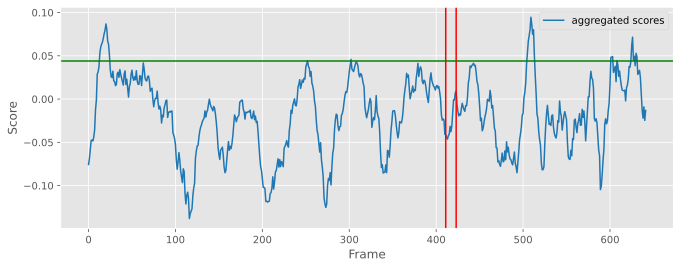

The current video be processed: subject s37, video 0508

True Positive: 19 False Posive: 317 False Negative: 37
Precision = 0.05654761904761927, Recall =0.3392857142857145, F1-Score = 0.09693877551020463
Split 13 is processed.

Split 14 is in process.
------Initializing Model-------
Dataset Labels Counter({0: 76233, 1: 972})
After Downsampling Dataset Labels Counter({0: 38116, 1: 972})
After Augmentation Dataset Labels Counter({0: 38116, 1: 3888})
Epoch 1/20
329/329 [==============================] - 54s 119ms/step - loss: 0.2007 - accuracy: 0.8409 - mean_absolute_error: 0.2581 - val_loss: 0.0134 - val_accuracy: 0.9939 - val_mean_absolute_error: 0.0792
Epoch 2/20
329/329 [==============================] - 38s 113ms/step - loss: 0.1034 - accuracy: 0.8692 - mean_absolute_error: 0.1987 - val_loss: 0.0130 - val_accuracy: 0.9939 - val_mean_absolute_error: 0.0747
Epoch 3/20
329/329 [==============================] - 38s 115ms/step - loss: 0.0793 - accuracy: 0.9048 - mean_absolute_error: 0.17

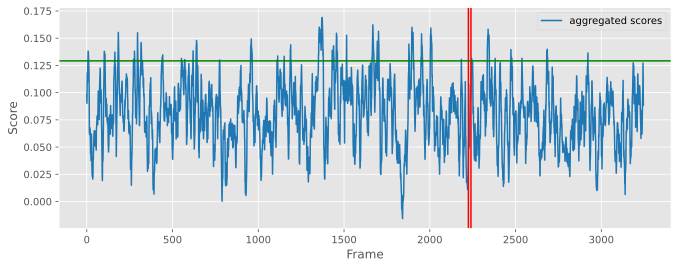

The current video be processed: subject s38, video 0507

True Positive: 19 False Posive: 359 False Negative: 38
Precision = 0.050264550264550484, Recall =0.33333333333333354, F1-Score = 0.08735632183908101
Split 14 is processed.



In [19]:
from training_backup import train
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

model_names = {
    0: "SOFTNet",
    1: "SOFTNetCBAM",
    2: "ViT",
    3: "SL-ViT",
    4: "Swin-T",
    5: "Swin-S",
    6: "SL-Swin-T",
    7: "SL-Swin-S",
}


metric_fn, matrix = train(
    X=X,
    y=y,
    groups=groups,
    expression_type=expression_type,
    model_name=model_names[5],
    train_or_not=True,
    epochs=20,
    batch_size=128,
    clean_subjects_videos_ground_truth_labels=clean_subjects_videos_ground_truth_labels,
    resampled_clean_videos_images_features=resampled_clean_videos_images_features,
    clean_subjects=clean_subjects,
    clean_subjects_videos_code=clean_subjects_videos_code,
    k=k,
    show_plot_or_not=True,
)


## Final Evaluation


In [20]:
from evaluation import final_evaluate

final_evaluate(metric_fn, matrix)


True Positive: 19 False Posive: 359
COCO AP@[.5:.95]: 0.0088
Final Precision = 0.03982756371736217,
Final Recall =0.21143757891060955,
Final F1-Score = 0.06677863623974142

Highest Precision = 0.05769230769230792,
Highest Recall =0.3392857142857145,
Highest F1-Score = 0.09836065573770547


| Parameters | Value
| --- | ---
| model | SL-Swin-S
| epochs | 25
| learning_rate | 0.0005
| learning_rate_decay | 0.00005
| True Positive | 9
| False Positive | 
| False Negative | 
| Precision | 
| Recall | 
| F1-Score | 
| COCO AP@[.5:.95] | 
